# Applying Classification Modeling

The goal of this week's assessment is to find the model which best predicts whether or not a person will default on their credit card payment. In doing so, we want to utilize all of the different tools we have learned over the course: data cleaning, EDA, feature engineering/transformation, feature selection, hyperparameter tuning, and model evaluation. 


#### Data Set Information:

- This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

- NT is the abbreviation for New Taiwan. 


#### Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2: Gender (1 = male; 2 = female). 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4: Marital status (1 = married; 2 = single; 3 = others). 
- X5: Age (year). 
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
    - X6 = the repayment status in September, 2005; 
    - X7 = the repayment status in August, 2005; . . .;
    - etc...
    - X11 = the repayment status in April, 2005. 
    - The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- X12-X17: Amount of bill statement (NT dollar). 
    - X12 = amount of bill statement in September, 2005;
    - etc...
    - X13 = amount of bill statement in August, 2005; . . .; 
    - X17 = amount of bill statement in April, 2005. 
- X18-X23: Amount of previous payment (NT dollar). 
    - X18 = amount paid in September, 2005; 
    - X19 = amount paid in August, 2005; . . .;
    - etc...
    - X23 = amount paid in April, 2005. 




You will fit three different models (KNN, Logistic Regression, and Decision Tree Classifier) to predict credit card defaults and use gridsearch to find the best hyperparameters for those models. Then you will compare the performance of those three models on a test set to find the best one.  


## Process/Expectations

- You will be working in pairs for this assessment

### Please have ONE notebook and be prepared to explain how you worked with your partner.

1. Clean up your data set so that you can perform an EDA. 
    - This includes handling null values, categorical variables, removing unimportant columns, and removing outliers.
2. Perform EDA to identify opportunities to create new features.
    - [Great Example of EDA for classification](https://www.kaggle.com/stephaniestallworth/titanic-eda-classification-end-to-end) 
    - [Using Pairplots with Classification](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166)
3. Engineer new features. 
    - Create polynomial and/or interaction features. 
    - Additionaly, you must also create **at least 2 new features** that are not interactions or polynomial transformations. 
        - *For example, you can create a new dummy variable that based on the value of a continuous variable (billamount6 >2000) or take the average of some past amounts.*
4. Perform some feature selection. 
    
5. You must fit **three** models to your data and tune **at least 1 hyperparameter** per model. 
6. Using the F-1 Score, evaluate how well your models perform and identify your best model.
7. Using information from your EDA process and your model(s) output provide insight as to which borrowers are more likely to deafult


In [83]:
# import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
pd.set_option("display.max_columns",300)


## 1. Data Cleaning

In [2]:
df = pd.read_csv('classification_lab_data.csv')

In [3]:
convert = ['LIMIT_BAL','BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',]

In [4]:
for col in convert:
    df[col.lower()+"_$"] = df[col]*0.032
    df.drop(col,axis = 1, inplace = True)

In [5]:
df.rename(columns = {"default payment next month":"default"}, inplace = True)

In [6]:
# maybe change (PAY) -1 , -2 to 0 because all pyments are on time
# change (PAY) col to month

In [7]:
df.head()

,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default,limit_bal_$,bill_amt1_$,bill_amt2_$,bill_amt3_$,bill_amt4_$,bill_amt5_$,bill_amt6_$,pay_amt1_$,pay_amt2_$,pay_amt3_$,pay_amt4_$,pay_amt5_$,pay_amt6_$
0,1,2,2,49,0,0,0,0,0,0,1,1600.0,2887.392,2900.704,2953.888,3004.160,3181.376,3244.544,91.264,89.088,83.296,320.000,101.248,91.776
1,1,2,1,39,0,0,0,0,0,0,0,960.0,668.576,710.592,616.736,527.008,469.440,358.848,64.224,64.000,64.000,13.344,48.000,48.000
2,1,1,2,27,0,0,0,0,0,0,0,8320.0,5078.752,4153.472,3255.072,2454.368,1815.616,1252.288,960.000,132.224,109.120,83.200,57.600,38.400
3,2,2,1,33,0,0,0,0,0,0,0,6400.0,760.384,830.208,863.616,807.584,708.192,440.768,128.000,64.000,19.200,96.000,128.000,3.200
4,1,1,2,27,0,0,0,0,0,0,0,1600.0,467.648,499.904,522.944,564.896,566.304,578.176,49.856,40.896,50.848,20.256,20.992,25.056


In [8]:
df.columns

Index(['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'default', 'limit_bal_$', 'bill_amt1_$',
       'bill_amt2_$', 'bill_amt3_$', 'bill_amt4_$', 'bill_amt5_$',
       'bill_amt6_$', 'pay_amt1_$', 'pay_amt2_$', 'pay_amt3_$', 'pay_amt4_$',
       'pay_amt5_$', 'pay_amt6_$'],
      dtype='object')

In [9]:
y = df.default

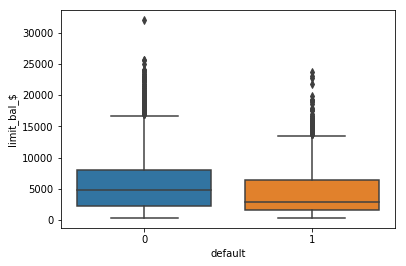

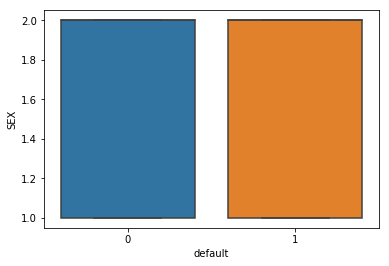

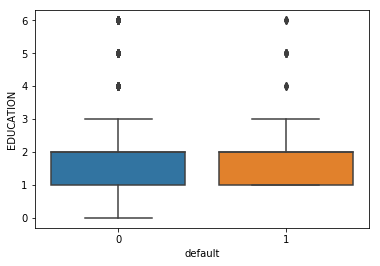

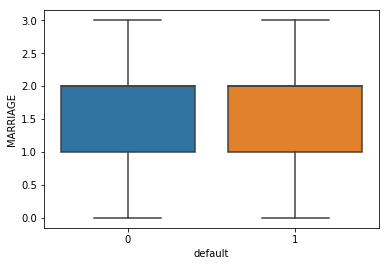

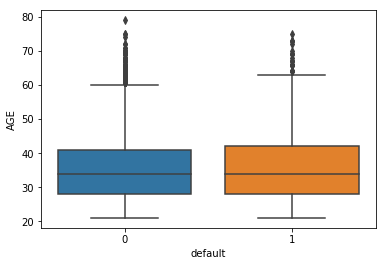

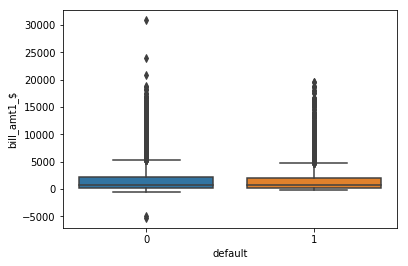

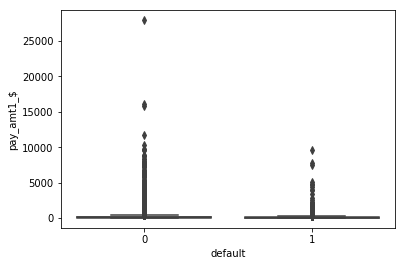

In [10]:
plots = ['limit_bal_$', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', "bill_amt1_$", "pay_amt1_$"]
for col in plots:
    fig = plt.figure
    sns.boxplot(x="default", y=col, data=df)
    plt.show()

In [11]:
df.groupby(["default"]).mean()

,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,limit_bal_$,bill_amt1_$,bill_amt2_$,bill_amt3_$,bill_amt4_$,bill_amt5_$,bill_amt6_$,pay_amt1_$,pay_amt2_$,pay_amt3_$,pay_amt4_$,pay_amt5_$,pay_amt6_$
default,,,,,,,,,,,,,,,,,,,,,,,
0,1.613985,1.844578,1.556739,35.463699,-0.209138,-0.302445,-0.317104,-0.353593,-0.384410,-0.400246,5709.018458,1667.585416,1595.106868,1529.722970,1407.309856,1306.637547,1256.861980,202.274207,215.189839,184.313571,169.151803,168.269164,183.358812
1,1.567069,1.899774,1.529766,35.732856,0.668802,0.455350,0.367747,0.263564,0.172005,0.116993,4178.132208,1591.915750,1548.028823,1482.120464,1381.000555,1294.430185,1249.615699,110.640512,113.173492,111.035955,102.380956,105.567560,113.286806


In [12]:
#sns.lmplot(x='PAY_0', y='default', data=df, ci=None, logistic=True, x_jitter=0.1, y_jitter=0.05)
#sns.set({"alpha":0.3})

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23999 entries, 0 to 23998
Data columns (total 24 columns):
SEX            23999 non-null int64
EDUCATION      23999 non-null int64
MARRIAGE       23999 non-null int64
AGE            23999 non-null int64
PAY_0          23999 non-null int64
PAY_2          23999 non-null int64
PAY_3          23999 non-null int64
PAY_4          23999 non-null int64
PAY_5          23999 non-null int64
PAY_6          23999 non-null int64
default        23999 non-null int64
limit_bal_$    23999 non-null float64
bill_amt1_$    23999 non-null float64
bill_amt2_$    23999 non-null float64
bill_amt3_$    23999 non-null float64
bill_amt4_$    23999 non-null float64
bill_amt5_$    23999 non-null float64
bill_amt6_$    23999 non-null float64
pay_amt1_$     23999 non-null float64
pay_amt2_$     23999 non-null float64
pay_amt3_$     23999 non-null float64
pay_amt4_$     23999 non-null float64
pay_amt5_$     23999 non-null float64
pay_amt6_$     23999 non-null float64
d

In [14]:
df.columns

Index(['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'default', 'limit_bal_$', 'bill_amt1_$',
       'bill_amt2_$', 'bill_amt3_$', 'bill_amt4_$', 'bill_amt5_$',
       'bill_amt6_$', 'pay_amt1_$', 'pay_amt2_$', 'pay_amt3_$', 'pay_amt4_$',
       'pay_amt5_$', 'pay_amt6_$'],
      dtype='object')

In [15]:
#Engineering Credit Length:
credit_cols = ['bill_amt6_$','bill_amt5_$','bill_amt4_$','bill_amt3_$','bill_amt2_$','bill_amt1_$']
payment_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
payment_amt_col = ['pay_amt1_$', 'pay_amt2_$', 'pay_amt3_$', 'pay_amt4_$','pay_amt5_$', 'pay_amt6_$']

#Lenght of credit history
def credit_len (n,credit_cols):
    obs = df.iloc[n]
    for n , col in enumerate(credit_cols):
        if obs[col] > 0:
            return 6-n
    return 0

#Number of Credits taken
def credit_number (n,credit_cols):
    """Counts month in which client had depts"""
    obs = df.iloc[n]
    i = 0
    for col in credit_cols:
        if obs[col]>0:
            i += 1
    return i

#Credit Payment Score
def payment_score(n,payment_cols):
    obs = df.iloc[n]
    return sum([obs[x] for x in payment_cols])
#Sums of payment

def payment_sum(n,payment_amt_col):
    obs = df.iloc[n]
    return sum([obs[col] for col in payment_amt_col])
#Sums of Biills

def bill_sum(n,credit_cols):
    obs = df.iloc[n]
    return sum([obs[col] for col in credit_cols])

### Credit Score Features following the aproach from:
https://www.thebalance.com/what-your-credit-score-is-made-of-960450

In [16]:
df["payment_score"] = [payment_score(n, payment_cols) for n in range(len(df))] #0.375 #the higher the worse

In [17]:
df["cur_debt_rt"] = df["bill_amt1_$"]/df["limit_bal_$"] #0.325 #the higher the worse

In [18]:
df["credit_hist"] = [credit_len(n, credit_cols) for n in range(len(df))] #0.175 #the higher the better

In [19]:
df["credit_number"] = [credit_number(n, credit_cols) for n in range(len(df))] #0.125 #the higher the worse

In [ ]:
#more feature engeneering

In [20]:
df["payment_sum"] = [payment_sum(n,payment_amt_col) for n in range(len(df))] 

In [21]:
df["bill_sum"] = [bill_sum(n,credit_cols) for n in range(len(df))] 

In [24]:
df.head()

,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default,limit_bal_$,bill_amt1_$,bill_amt2_$,bill_amt3_$,bill_amt4_$,bill_amt5_$,bill_amt6_$,pay_amt1_$,pay_amt2_$,pay_amt3_$,pay_amt4_$,pay_amt5_$,pay_amt6_$,payment_score,cur_debt_rt,credit_hist,credit_number,payment_sum,bill_sum
0,1,2,2,49,0,0,0,0,0,0,1,1600.0,2887.392,2900.704,2953.888,3004.160,3181.376,3244.544,91.264,89.088,83.296,320.000,101.248,91.776,0.0,1.804620,6,6,776.672,18172.064
1,1,2,1,39,0,0,0,0,0,0,0,960.0,668.576,710.592,616.736,527.008,469.440,358.848,64.224,64.000,64.000,13.344,48.000,48.000,0.0,0.696433,6,6,301.568,3351.200
2,1,1,2,27,0,0,0,0,0,0,0,8320.0,5078.752,4153.472,3255.072,2454.368,1815.616,1252.288,960.000,132.224,109.120,83.200,57.600,38.400,0.0,0.610427,6,6,1380.544,18009.568
3,2,2,1,33,0,0,0,0,0,0,0,6400.0,760.384,830.208,863.616,807.584,708.192,440.768,128.000,64.000,19.200,96.000,128.000,3.200,0.0,0.118810,6,6,438.400,4410.752
4,1,1,2,27,0,0,0,0,0,0,0,1600.0,467.648,499.904,522.944,564.896,566.304,578.176,49.856,40.896,50.848,20.256,20.992,25.056,0.0,0.292280,6,6,207.904,3199.872


## 2. EDA

In [26]:
#SEX
df.SEX.value_counts()

2    14486
1     9513
Name: SEX, dtype: int64

In [27]:
df.SEX = df.SEX-1

In [28]:
df.EDUCATION.value_counts().sort_index()

0       11
1     8442
2    11188
3     3994
4      100
5      223
6       41
Name: EDUCATION, dtype: int64

In [29]:
import tpclean.tpclean as tp

In [31]:
col_dict=[{"name":"EDUCATION","bins":[0,1,2,3,4,5,6,99],"labels":[0,1,2,3,4,5,"6+"],"abr":"edu"}]
df = tp.dummy_transformation(df_test, col_dict, one_hot=True)
df.drop("edu_6+", axis = 1, inplace = True)

In [32]:
df["MARRIAGE"] = df["MARRIAGE"].replace(3,0)

In [33]:
df_test = df.copy()

In [34]:
df.to_csv("Credit_data_engineered.csv", index = False)

## 3. Feature Engineering

In [35]:
df.head()

,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default,limit_bal_$,bill_amt1_$,bill_amt2_$,bill_amt3_$,bill_amt4_$,bill_amt5_$,bill_amt6_$,pay_amt1_$,pay_amt2_$,pay_amt3_$,pay_amt4_$,pay_amt5_$,pay_amt6_$,payment_score,cur_debt_rt,credit_hist,credit_number,payment_sum,bill_sum,edu_1,edu_2,edu_3,edu_4,edu_5
0,0,2,49,0,0,0,0,0,0,1,1600.0,2887.392,2900.704,2953.888,3004.160,3181.376,3244.544,91.264,89.088,83.296,320.000,101.248,91.776,0.0,1.804620,6,6,776.672,18172.064,1,0,0,0,0
1,0,1,39,0,0,0,0,0,0,0,960.0,668.576,710.592,616.736,527.008,469.440,358.848,64.224,64.000,64.000,13.344,48.000,48.000,0.0,0.696433,6,6,301.568,3351.200,1,0,0,0,0
2,0,2,27,0,0,0,0,0,0,0,8320.0,5078.752,4153.472,3255.072,2454.368,1815.616,1252.288,960.000,132.224,109.120,83.200,57.600,38.400,0.0,0.610427,6,6,1380.544,18009.568,0,0,0,0,0
3,1,1,33,0,0,0,0,0,0,0,6400.0,760.384,830.208,863.616,807.584,708.192,440.768,128.000,64.000,19.200,96.000,128.000,3.200,0.0,0.118810,6,6,438.400,4410.752,1,0,0,0,0
4,0,2,27,0,0,0,0,0,0,0,1600.0,467.648,499.904,522.944,564.896,566.304,578.176,49.856,40.896,50.848,20.256,20.992,25.056,0.0,0.292280,6,6,207.904,3199.872,0,0,0,0,0


### Polynomials and Interaction Terms

In [36]:
from sklearn.preprocessing import PolynomialFeatures

In [37]:
X = df.drop("default", axis = 1)
y = df.default

In [54]:
columns = list(X.columns)
poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly_2.fit(X)
X_poly_2= pd.DataFrame(poly_2.transform(X), columns=poly_2.get_feature_names(columns))
#columns_2  = poly_2.get_feature_names(columns)

In [58]:
#X_poly_2.head()

In [57]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train , y_test = train_test_split(X_poly_2,y)

In [22]:
##Scale Everything

In [65]:
from sklearn.preprocessing import StandardScaler

In [67]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns = list(X_train.columns))

In [70]:
from sklearn.preprocessing import MinMaxScaler

In [81]:
credit_score_values = {"payment_score": 0.375,
                        "cur_debt_rt": 0.325,
                        "credit_hist": 0.175,
                       "credit_number": 0.125}

In [80]:
scaler_min_max = MinMaxScaler()
subset = X_train[credit_score_values.keys()]
scaler_min_max.fit(subset)
subset_df = pd.DataFrame(scaler_min_max.transform(subset), columns = list(subset.columns))

In [85]:
np.zeros(len(df))

array([0., 0., 0., ..., 0., 0., 0.])

In [93]:
# invert credit hist to map it the higher the worse
subset_df["credit_hist"] = 1 - subset_df["credit_hist"]

In [95]:
def bgtp_credit_score(df):
    out = np.zeros(len(df))
    for key in credit_score_values.keys():
        out += df[key]*credit_score_values[key]
    return out

In [96]:
test = bgtp_credit_score(subset_df)

In [97]:
subset_df["bgtp_score"] = test

In [104]:
subset_df.head()

,payment_score,cur_debt_rt,credit_hist,credit_number,bgtp_score
0,0.250000,0.215673,0.000000,1.000000,0.288844
1,0.041667,0.094552,0.833333,0.166667,0.213021
2,0.333333,0.189624,0.166667,0.833333,0.319961
3,0.208333,0.123261,0.000000,1.000000,0.243185
4,0.187500,0.087615,0.000000,0.833333,0.202954


## 4. Feature Selection

In [ ]:
sns.distplot(defaults.AGE)
sns.distplot(non_defaults.AGE)

In [ ]:
sns.distplot(defaults.EDUCATION)
sns.distplot(non_defaults.EDUCATION)

In [ ]:
defaults = df.loc[df["default"]==1]
non_defaults = df.loc[df["default"]==0]

## 5. Model Fitting and Hyperparameter Tuning
KNN, Logistic Regression, Decision Tree

## 6. Model Evaluation

## 7. Final Model